In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns ; sns.set()
%matplotlib inline

In [2]:
# Only using the Teams, and Detailed Tournament Results files

tourney_df = pd.read_csv('../../data/TourneyDetailedResults.csv')
teams_df = pd.read_csv('../../data/Teams.csv')
team_dict = dict(zip(teams_df['Team_Id'].values, teams_df['Team_Name'].values))
tourney_df['Wteam_name'] = tourney_df['Wteam'].map(team_dict)
tourney_df['Lteam_name'] = tourney_df['Lteam'].map(team_dict)

In [3]:
columns = tourney_df.columns
tourney_df.ix[:, :columns[16]].head(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,Wfgm3,Wfga3,Wftm,Wfta,Wor,Wdr,Wast
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18


In [4]:
tourney_df.ix[:, columns[17]:].head(3)

,Wto,Wstl,Wblk,Wpf,Lfgm,Lfga,Lfgm3,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf,Wteam_name,Lteam_name
0,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22,UNC Asheville,TX Southern
1,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15,Arizona,Vermont
2,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18,Arizona St,Memphis


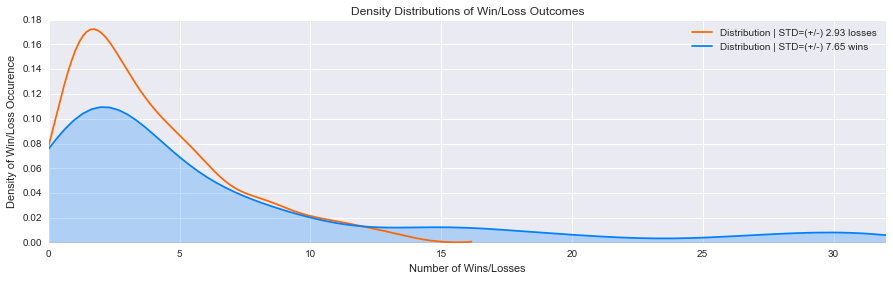

In [5]:
# Distribution density of wins and losses.

tourney_wins = tourney_df.loc[tourney_df['Wteam'] !=0, 'Wteam'].value_counts()
tourney_losses = tourney_df.loc[tourney_df['Wteam'] !=0, 'Lteam'].value_counts()
tourney_df['Wwins'] = tourney_df['Wteam'].map(tourney_wins)
tourney_df['Lwins'] = tourney_df['Lteam'].map(tourney_wins)
tourney_df = tourney_df.replace(np.nan, 0)

plt.figure(figsize=(15, 4))

sns.kdeplot(tourney_losses, color='#ff6600', label='Distribution | STD=(+/-) %3.2f losses'%(np.std(tourney_losses)))
sns.kdeplot(tourney_wins, shade='True', color ='#0080ff', label='Distribution | STD=(+/-) %3.2f wins'%(np.std(tourney_wins)))

plt.title('Density Distributions of Win/Loss Outcomes')
plt.xlabel('Number of Wins/Losses')
plt.ylabel('Density of Win/Loss Occurence')
plt.xlim([0, max(tourney_wins)])
plt.legend(loc='upper right')

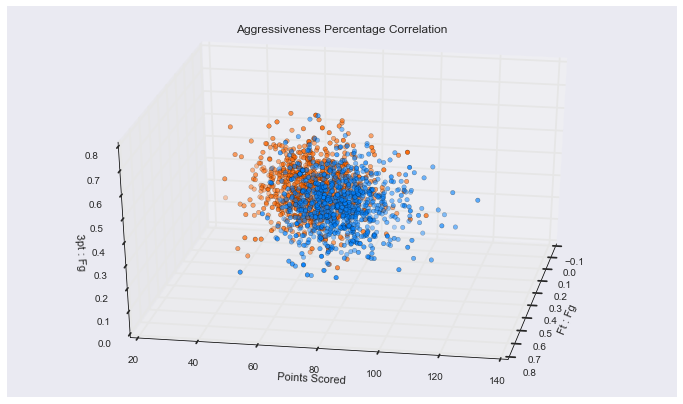

In [10]:
# Look at a key statistic "Aggressiveness Percentage (AP)" - 
# [Free throws to Field goals taken ratio], <code>[Three pointers taken to Field 
# goals ratio], for both the winning and the losing teams.

wft_wfg = (tourney_df['Wfta'].values * 0.66) / tourney_df['Wfga'].values 
wtp_wfg = tourney_df['Wfga3'].values / tourney_df['Wfga'].values

# arbitraty penalty term = 0.66 - some ft attempts stem from fg attempts
# this can obviously be changed to a different value

lft_lfg = (tourney_df['Lfta'].values * 0.66) / tourney_df['Lfga'].values
ltp_lfg = tourney_df['Lfga3'].values / tourney_df['Lfga'].values

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('Aggressiveness Percentage Correlation')
ax.scatter(wft_wfg, tourney_df['Wscore'], wtp_wfg, c='#0080ff')
ax.scatter(lft_lfg, tourney_df['Lscore'], ltp_lfg, c='#ff6600')
ax.set_xlabel('Ft : Fg')
ax.set_ylabel('Points Scored')
ax.set_zlabel('3pt : Fg')
ax.view_init(azim=10)

In [11]:
# In winning teams, [Ft : Fg] ratio correlation to Points scored is much 
# stronger (9.78) than it is in losing teams (0.22). Further, in winning teams, 
# Points scored is much more negatively correlated to [Tp : Fg] ratio, than it is 
# in losing teams.

# True shooting percentage
wtsp = tourney_df['Wscore'] / (2 * (tourney_df['Wfga'] + (0.44 * tourney_df['Wfta'])))
ltsp = tourney_df['Lscore'] / (2 * (tourney_df['Lfga'] + (0.44 * tourney_df['Lfta'])))

# Offensive effeciency rating
w_off_rating = 100 * tourney_df['Wscore'] / (tourney_df['Wfga'] + 0.40 * tourney_df['Wfta'] - 1.07 * \
                                            (tourney_df['Wor'] / (tourney_df['Wor'] + tourney_df['Wdr'])) * \
                                            (tourney_df['Wfga'] + tourney_df['Wfgm']) + tourney_df['Wto'])
l_off_rating = 100 * tourney_df['Lscore'] / (tourney_df['Lfga'] + 0.40 * tourney_df['Lfta'] - 1.07 * \
                                            (tourney_df['Lor'] / (tourney_df['Lor'] + tourney_df['Ldr'])) * \
                                            (tourney_df['Lfga'] + tourney_df['Lfgm']) + tourney_df['Lto'])

Correlation between Winning team offensive rating
and amount of NCAAM tourney wins winning team has:
[[ 1.          0.05704744 -0.19784218]
 [ 0.05704744  1.          0.03084211]
 [-0.19784218  0.03084211  1.        ]]


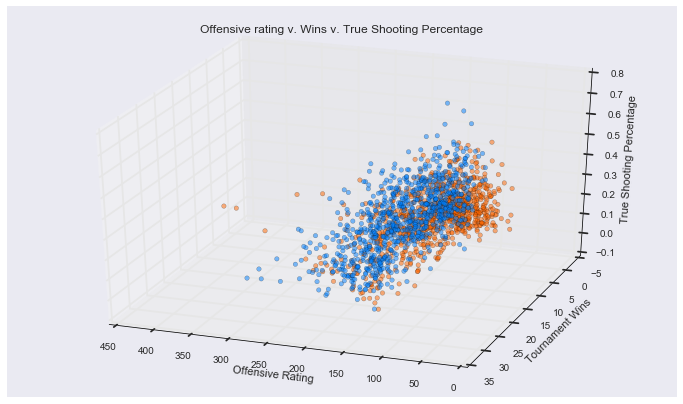

In [15]:

# Note: Number of wins for a team in the "Wteam" column will equal number of wins of 
# that same team if that team is in the "Lteam" column. Number of tournament wins is just, 
# "How many times has this "Team_Id" won an NCAA tourney game".

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('Offensive rating v. Wins v. True Shooting Percentage')
ax.scatter(w_off_rating, tourney_df['Wwins'], wft_wfg, c='#0080ff', alpha=0.5, edgecolors='None', label='Winning Teams')
ax.scatter(l_off_rating, tourney_df['Lwins'], lft_lfg, c='#ff6600', alpha=0.5, edgecolors='None', label='Losing Teams')
ax.set_xlabel('Offensive Rating')
ax.set_ylabel('Tournament Wins')
ax.set_zlabel('True Shooting Percentage')
ax.view_init(azim=110)

print('==================================================')
print('Correlation between Winning team offensive rating')
print('and amount of NCAAM tourney wins winning team has:')
print('==================================================')
print(np.corrcoef((w_off_rating, tourney_df['Wwins'], wft_wfg)))

# While I was surprised to see that Offensive Rating didn't have more of a 
# correlation with Number of Tourney Wins, I'm not surprised at Offensive Rating's 
# relatively strong correlation to the Aggressiveness Percentage (AP) "[FT's : FG's]/[3s:FGs]", 
# which just shows how key of a stat AP really is (in my opinion).